# Benchmarking: Compare different scores with the fingerprint-based similarities

In [1]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt

ROOT = os.path.dirname(os.getcwd())
#path_data = os.path.join(ROOT, 'data')
path_data = 'C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA\\matchms\\data\\'
sys.path.insert(0, ROOT)

### Import reference similarity matrix

In [2]:
filename = os.path.join(path_data,'similarities_daylight2048_jaccard.npy')
matrix_similarities_fingerprint_daylight = np.load(filename)

In [3]:
np.any(np.isnan(matrix_similarities_fingerprint_daylight))

True

### Import already computed similarity matrix

In [4]:
filename = os.path.join(path_data,'similarities_cosine_tol0005_200708.npy')
matrix_similarities_cosine = np.load(filename)

filename = os.path.join(path_data,'similarities_cosine_tol0005_200708_matches.npy')
matrix_matches_cosine = np.load(filename)

print("Matrix dimension", matrix_matches_cosine.shape)

Matrix dimension (12797, 12797)


In [5]:
# Only consider values for mininum 6 matching peaks
matrix_similarities_cosine_minmatch6 = matrix_similarities_cosine.copy()
matrix_similarities_cosine_minmatch6[matrix_matches_cosine < 6] = 0

### Import already computed similarity matrix: Modified Cosine

In [6]:
filename = os.path.join(path_data,'similarities_mod_cosine_tol0005_200727.npy')
matrix_similarities_mod_cosine = np.load(filename)

filename = os.path.join(path_data,'similarities_mod_cosine_tol0005_200727_matches.npy')
matrix_matches_mod_cosine = np.load(filename)

In [7]:
# Only consider values for mininum 10 matching peaks
matrix_similarities_mod_cosine_minmatch10 = matrix_similarities_mod_cosine.copy()
matrix_similarities_mod_cosine_minmatch10[matrix_matches_mod_cosine < 10] = 0

## Compare spec2vec with reference fingerprint scores

In [8]:
filename = os.path.join(path_data,'similarities_spec2vec_2dec_UniqueInchikeys_iter_50.npy')
matrix_similarities_spec2vec = np.load(filename)

In [9]:
non_zero_scores = np.where(matrix_similarities_mod_cosine_minmatch10 > 0)
len(non_zero_scores[0])

15889189

In [22]:
non_zero_scores

(array([    0,     0,     0, ..., 12796, 12796, 12796], dtype=int64),
 array([    0,   451,   453, ..., 12792, 12793, 12796], dtype=int64))

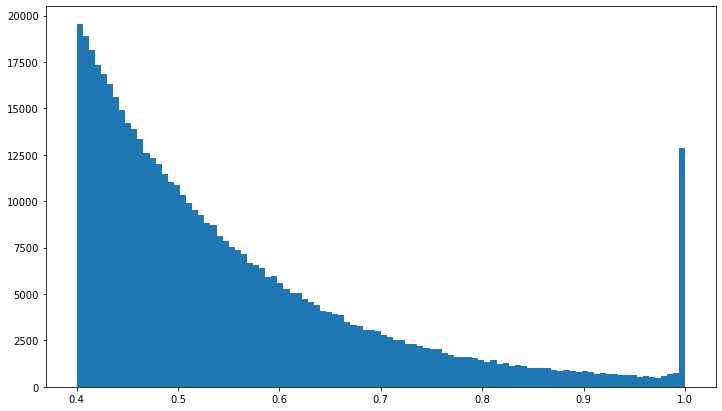

In [10]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,7))
#plt.xlabel("number of peaks in spectrum")
#plt.ylabel("number of spectra in respective bin")

hist = plt.hist(matrix_similarities_mod_cosine_minmatch10[matrix_similarities_mod_cosine_minmatch10 > 0.4], 100)

In [11]:
def analyse_claimed_high_scores(arr_ref, arr_sim, threshold=0.8):
    def _ignore_reference_nans(arr_ref, arr_sim):
        assert arr_ref.shape == arr_sim.shape, "Expected two arrays of identical shape."
        idx_not_nans = np.where(np.isnan(arr_ref) == False)
        arr_sim = arr_sim[idx_not_nans]
        arr_ref = arr_ref[idx_not_nans]
        return arr_ref, arr_sim

    np.fill_diagonal(arr_ref, np.nan)
    arr_ref, arr_sim = _ignore_reference_nans(arr_ref, arr_sim)
    
    claimed_high_scores = arr_ref[arr_sim > threshold]
    hist, bins = np.histogram(claimed_high_scores, 100)
    return hist, bins, len(claimed_high_scores)


def analyse_claimed_low_scores(arr_ref, arr_sim, threshold=0.2):
    def _ignore_reference_nans(arr_ref, arr_sim):
        assert arr_ref.shape == arr_sim.shape, "Expected two arrays of identical shape."
        idx_not_nans = np.where(np.isnan(arr_ref) == False)
        arr_sim = arr_sim[idx_not_nans]
        arr_ref = arr_ref[idx_not_nans]
        return arr_ref, arr_sim
    
    def _ignore_zeros(arr_ref, arr_sim):
        assert arr_ref.shape == arr_sim.shape, "Expected two arrays of identical shape."
        idx_not_zero = np.where(arr_ref > 0)
        arr_sim = arr_sim[idx_not_zero]
        arr_ref = arr_ref[idx_not_zero]
        return arr_ref, arr_sim

    np.fill_diagonal(arr_ref, np.nan)
    arr_ref, arr_sim = _ignore_reference_nans(arr_ref, arr_sim)
    arr_ref, arr_sim = _ignore_zeros(arr_ref, arr_sim)
    
    claimed_low_scores = arr_ref[arr_sim < threshold]
    hist, bins = np.histogram(claimed_low_scores, 100)
    return hist, bins, len(claimed_low_scores)
    

In [12]:
thresholds = [0.7, 0.8, 0.85, 0.9, 0.95, 0.98]

collect_hist = []
collect_bins = []
collect_num_of_scores = []
for threshold in thresholds:
    hist, bins, num_of_scores = analyse_claimed_high_scores(matrix_similarities_fingerprint_daylight,
                                                            matrix_similarities_mod_cosine_minmatch10,
                                                            threshold=threshold)
    collect_hist.append(hist)
    collect_bins.append(bins)
    collect_num_of_scores.append(num_of_scores)

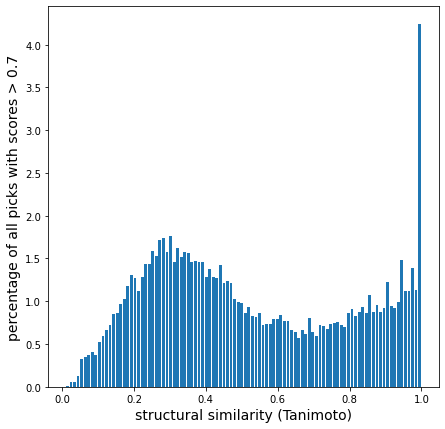

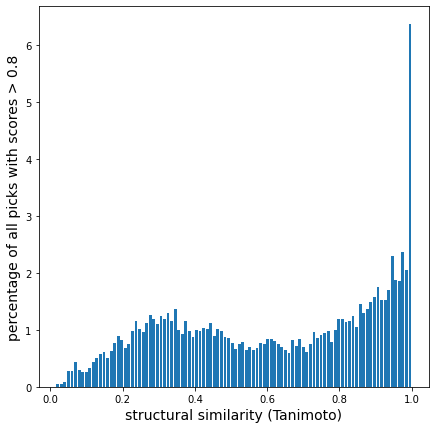

In [13]:
def plot_histogram(hist, bins, threshold,
                  figsize=(7,7)):
    plt.figure(figsize=figsize)
    width = 0.8 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, 100*hist/sum(hist), align='center', width=width)
    plt.xlabel("structural similarity (Tanimoto)", fontsize=14)
    plt.ylabel("percentage of all picks with scores > {:.2}".format(threshold), fontsize=14)
    
plot_histogram(collect_hist[0], collect_bins[0], thresholds[0])
plot_histogram(collect_hist[1], collect_bins[1], thresholds[1])

In [18]:
k

NameError: name 'k' is not defined

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

colors = ["crimson", "lightblue", "teal"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)


plt.figure(figsize=(10,10))
#fig, axes = plt.subplots(1, 1, sharex=True)
plt.style.use('seaborn-white')

shift = 0.7
alpha = 1.0 #0.5

tanimoto_bins = []
for i in range(n_bins):
    tanimoto_bins.append((i*d_bin, (i+1)*d_bin))
    
for i in range(0, len(histograms)):
    data = histograms[len(histograms)-i-1][0]
    data = data/max(data)
    plt.fill_between(histograms[0][1][:100], -shift*i, [(-shift*i + x) for x in data], color=cmap1(i/10), alpha=alpha)
    if i > 0:
        plt.plot(histograms[0][1][:100], [(-shift*i + x) for x in data], color="white")
    
plt.yticks(-shift*np.arange(len(histograms)),
           [f"{a:.2f} to {b:.2f}" for (a, b) in tanimoto_bins[::-1]], fontsize=12)
plt.xlabel("MS2DeepScore", fontsize=12)
plt.ylabel("Tanimoto similarity", fontsize=12)

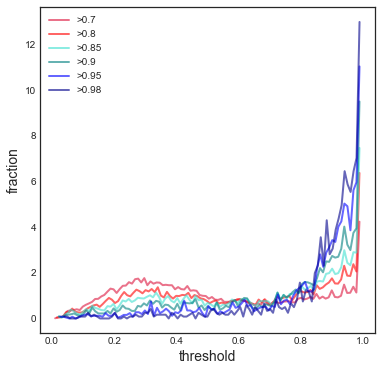

In [61]:
plt.style.use('seaborn-white')

def bar_plot_2d(collect_hist, collect_bins, collect_num_of_scores, thresholds):
    colors = ['crimson', 'r', 'turquoise', 'teal', 'b', 'darkblue']
    shift = 0#0.2
    alpha = 0.1
    
    yticks = thresholds
    count = 0

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)

    for c, ytick in zip(colors, yticks):
        hist = collect_hist[count]
        bins = collect_bins[count]
        
        width = 0.8 * (bins[1] - bins[0])
        center = (bins[:-1] + bins[1:]) / 2

        cs = [c] * len(center)

        #plt.bar(center, 100*hist/sum(hist), align='center', width=width)

        # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
        #ax.bar(center, 100*hist/sum(hist), width=width, color=cs, alpha=0.8)
        ax.plot(bins[:-1], 100*hist/sum(hist), marker='o', linestyle='solid',
                linewidth=2, markersize=0, color=c, alpha=0.6, label=f">{thresholds[count]}")
        #ax.fill_between(bins[:-1], shift*count,
        #                [(shift*count + x) for x in hist/sum(hist)], "--", color=c, alpha=alpha)
        #ax.fill_between(100*hist/sum(hist), -shift*count, [(-shift*i + x) for x in data], color=cmap1(i/10), alpha=alpha)
        
        #for zdir, x, y, z in zip(zdirs, xs, ys, zs):
        label = "{} pairs".format(collect_num_of_scores[count]) #'(%d, %d, %d), dir=%s' % (x, y, z, zdir)
        #ax.text(1, k, max(100*hist/sum(hist)), label, zdir=(1, -0.25, 0), fontsize=14)

        count += 1

    #ax.set_zlim(0, 10)
    ax.set_ylabel("fraction", fontsize=14)
    ax.set_xlabel("threshold", fontsize=14)
    plt.legend()
bar_plot_2d(collect_hist, collect_bins, collect_num_of_scores, thresholds)
#plt.savefig("score_evaluation_modcos_minmatch10.pdf")

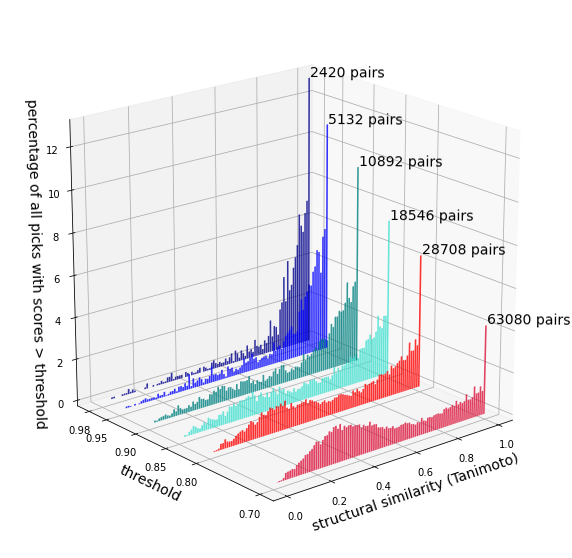

In [13]:
def bar_plot_3d(collect_hist, collect_bins, collect_num_of_scores, thresholds):
    colors = ['crimson', 'r', 'turquoise', 'teal', 'b', 'darkblue']
    yticks = thresholds
    count = 0

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    for c, k in zip(colors, yticks):
        hist = collect_hist[count]
        bins = collect_bins[count]
        width = 0.8 * (bins[1] - bins[0])
        center = (bins[:-1] + bins[1:]) / 2

        # You can provide either a single color or an array with the same length as
        # xs and ys. To demonstrate this, we color the first bar of each set cyan.
        cs = [c] * len(center)
        #cs[0] = 'c'

        #plt.bar(center, 100*hist/sum(hist), align='center', width=width)

        # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
        ax.bar(center, 100*hist/sum(hist), zs=k, zdir='y', width=width, color=cs, alpha=0.8)
        
        #for zdir, x, y, z in zip(zdirs, xs, ys, zs):
        label = "{} pairs".format(collect_num_of_scores[count]) #'(%d, %d, %d), dir=%s' % (x, y, z, zdir)
        ax.text(1, k, max(100*hist/sum(hist)), label, zdir=(1, -0.25, 0), fontsize=14)

        count += 1

    #ax.set_zlim(0, 10)
    ax.set_xlabel("structural similarity (Tanimoto)", fontsize=14)
    ax.set_ylabel("threshold", fontsize=14)
    ax.set_zlabel("percentage of all picks with scores > threshold", fontsize=14)
    ax.view_init(20, 230)

    # On the y axis let's only label the discrete values that we have data for.
    ax.set_yticks(yticks)
    
    #plt.show()

bar_plot_3d(collect_hist, collect_bins, collect_num_of_scores, thresholds)
plt.savefig("score_evaluation_modcos_minmatch10.pdf")

In [16]:
collect_num_of_scores

[63080, 28708, 18546, 10892, 5132, 2420]

In [64]:
thresholds = [0.7, 0.8, 0.85, 0.9, 0.95, 0.98]

collect_hist_minmatch1 = []
collect_bins_minmatch1 = []
collect_num_of_scores_minmatch1 = []
for threshold in thresholds:
    hist, bins, num_of_scores = analyse_claimed_high_scores(matrix_similarities_fingerprint_daylight,
                                                            matrix_similarities_mod_cosine,
                                                            threshold=threshold)
    collect_hist_minmatch1.append(hist)
    collect_bins_minmatch1.append(bins)
    collect_num_of_scores_minmatch1.append(num_of_scores)

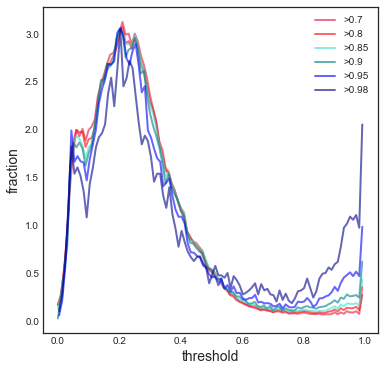

In [65]:
bar_plot_2d(collect_hist_minmatch1, collect_bins_minmatch1, collect_num_of_scores_minmatch1, thresholds)

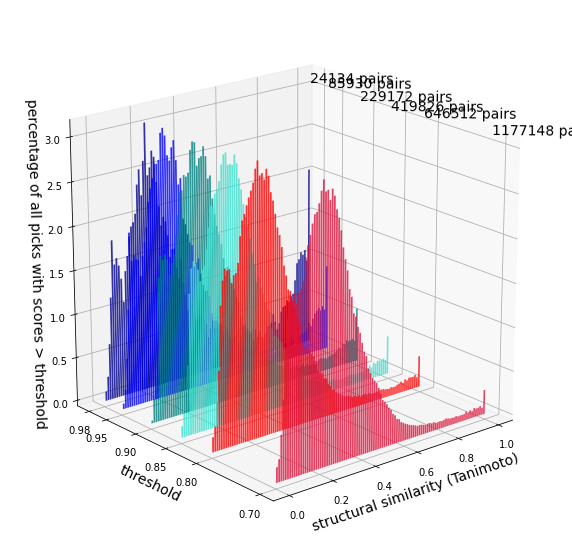

In [17]:
bar_plot_3d(collect_hist_minmatch1, collect_bins_minmatch1, collect_num_of_scores_minmatch1, thresholds)
plt.savefig("score_evaluation_modcos_minmatch1.pdf")

In [18]:
collect_num_of_scores_minmatch1

[1177148, 646512, 419826, 229172, 85930, 24134]

In [19]:
# Only consider values for mininum 6 matching peaks
matrix_similarities_mod_cosine_minmatch6 = matrix_similarities_mod_cosine.copy()
matrix_similarities_mod_cosine_minmatch6[matrix_matches_mod_cosine < 6] = 0

In [20]:
thresholds = [0.7, 0.8, 0.85, 0.9, 0.95, 0.98]

collect_hist_minmatch6 = []
collect_bins_minmatch6 = []
collect_num_of_scores_minmatch6 = []
for threshold in thresholds:
    hist, bins, num_of_scores = analyse_claimed_high_scores(matrix_similarities_fingerprint_daylight,
                                                            matrix_similarities_mod_cosine_minmatch6,
                                                            threshold=threshold)
    collect_hist_minmatch6.append(hist)
    collect_bins_minmatch6.append(bins)
    collect_num_of_scores_minmatch6.append(num_of_scores)

[124272, 57780, 36090, 20158, 8622, 3684]


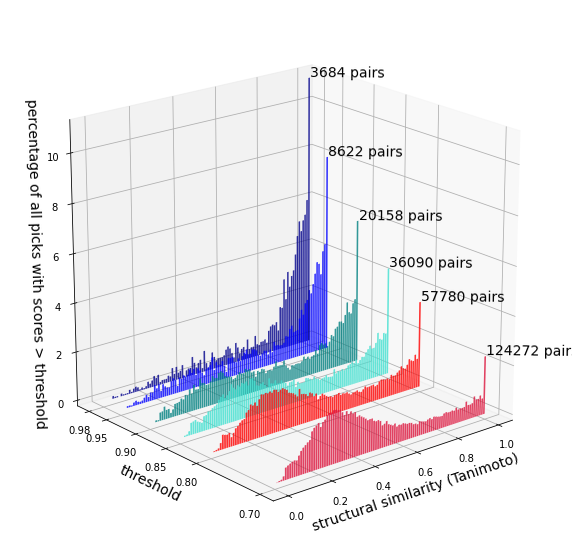

In [21]:
bar_plot_3d(collect_hist_minmatch6, collect_bins_minmatch6, collect_num_of_scores_minmatch6, thresholds)
plt.savefig("score_evaluation_modcos_minmatch6.pdf")
print(collect_num_of_scores_minmatch6)

In [24]:
thresholds = [0.7, 0.8, 0.85, 0.9, 0.95, 0.98]

collect_hist_s2v = []
collect_bins_s2v = []
collect_num_of_scores_s2v = []
for threshold in thresholds:
    hist, bins, num_of_scores = analyse_claimed_high_scores(matrix_similarities_fingerprint_daylight,
                                                            matrix_similarities_spec2vec,
                                                            threshold=threshold)
    collect_hist_s2v.append(hist)
    collect_bins_s2v.append(bins)
    collect_num_of_scores_s2v.append(num_of_scores)

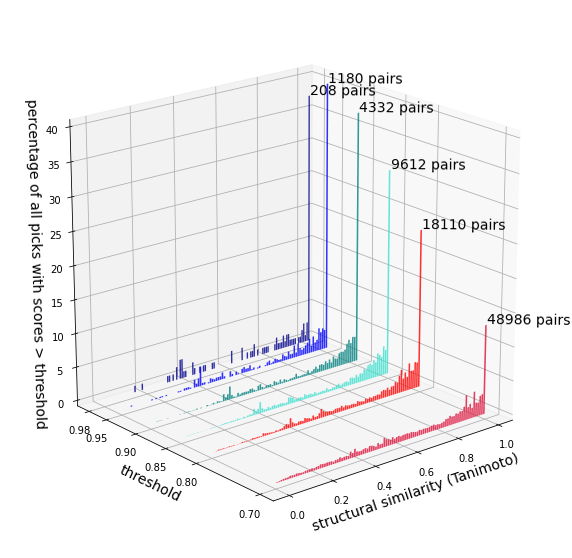

In [25]:
bar_plot_3d(collect_hist_s2v, collect_bins_s2v, collect_num_of_scores_s2v, thresholds)
plt.savefig("score_evaluation_modcos_s2v.svg")

### Compare histograms for similar retrieval numbers

In [33]:
def plot_histogram(hist, bins, threshold,
                  figsize=(6,6)):
    plt.figure(figsize=figsize)
    width = 1 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, 100*hist/sum(hist), align='center', width=width)
    plt.xlabel("structural similarity (Tanimoto)", fontsize=14)
    plt.ylabel("percentage of all picks with scores > {:.2}".format(threshold), fontsize=14)

threshold: 0.85


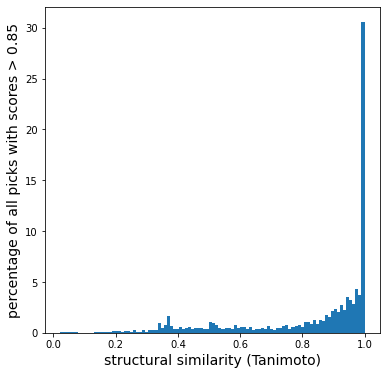

In [35]:
x = 2
print("threshold: {}".format(thresholds[x]))
plot_histogram(collect_hist_s2v[x], collect_bins_s2v[x], thresholds[x])
plt.savefig("example_histogram_spec2vec_threshold085.pdf")

threshold: 0.9


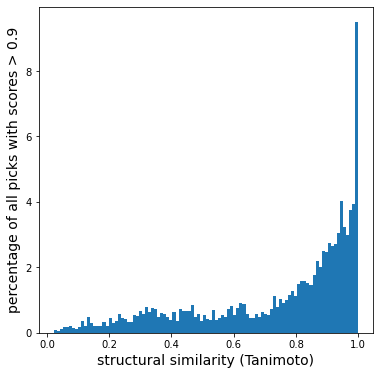

In [36]:
x = 3
print("threshold: {}".format(thresholds[x]))
plot_histogram(collect_hist[x], collect_bins[x], thresholds[x])
plt.savefig("example_histogram_modcos_mm10_threshold09.pdf")

threshold: 0.95


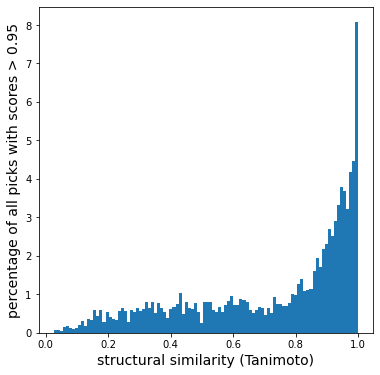

In [37]:
x = 4
print("threshold: {}".format(thresholds[x]))
plot_histogram(collect_hist_minmatch6[x], collect_bins_minmatch6[x], thresholds[x])
plt.savefig("example_histogram_modcos_mm6_threshold095.pdf")

In [40]:
thresholds2 = [0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 0.98]

collect_hist_s2v2 = []
collect_bins_s2v2 = []
collect_num_of_scores_s2v2 = []
for threshold in thresholds2:
    hist, bins, num_of_scores = analyse_claimed_high_scores(matrix_similarities_fingerprint_daylight,
                                                            matrix_similarities_spec2vec,
                                                            threshold=threshold)
    collect_hist_s2v2.append(hist)
    collect_bins_s2v2.append(bins)
    collect_num_of_scores_s2v2.append(num_of_scores)

In [43]:
def bar_plot_3d(collect_hist, collect_bins, collect_num_of_scores, thresholds):
    colors = ['pink', 'crimson', 'r', 'turquoise', 'teal', 'b', 'darkblue']
    yticks = thresholds
    count = 0

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    for c, k in zip(colors, yticks):
        hist = collect_hist[count]
        bins = collect_bins[count]
        width = 0.8 * (bins[1] - bins[0])
        center = (bins[:-1] + bins[1:]) / 2

        # You can provide either a single color or an array with the same length as
        # xs and ys. To demonstrate this, we color the first bar of each set cyan.
        cs = [c] * len(center)
        #cs[0] = 'c'

        #plt.bar(center, 100*hist/sum(hist), align='center', width=width)

        # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
        ax.bar(center, 100*hist/sum(hist), zs=k, zdir='y', width=width, color=cs, alpha=0.8)
        
        #for zdir, x, y, z in zip(zdirs, xs, ys, zs):
        label = "{} pairs".format(collect_num_of_scores[count]) #'(%d, %d, %d), dir=%s' % (x, y, z, zdir)
        ax.text(1, k, max(100*hist/sum(hist)), label, zdir=(1, -0.25, 0), fontsize=14)

        count += 1

    #ax.set_zlim(0, 10)
    ax.set_xlabel("structural similarity (Tanimoto)", fontsize=14)
    ax.set_ylabel("threshold", fontsize=14)
    ax.set_zlabel("percentage of all picks with scores > threshold", fontsize=14)
    ax.view_init(20, 230)

    # On the y axis let's only label the discrete values that we have data for.
    ax.set_yticks(yticks)

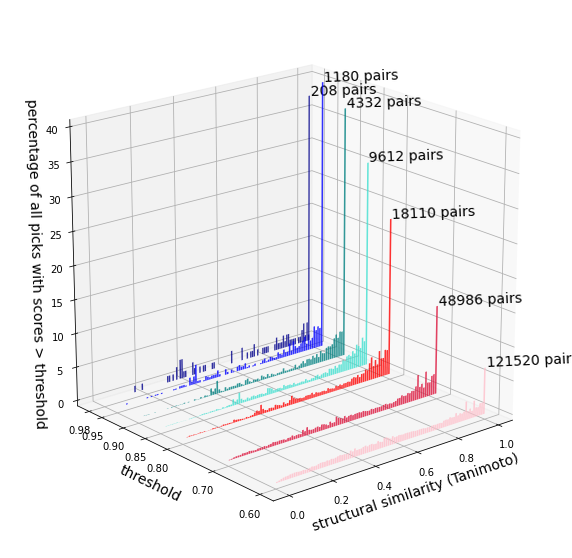

In [44]:
bar_plot_3d(collect_hist_s2v2, collect_bins_s2v2, collect_num_of_scores_s2v2, thresholds2)
plt.savefig("score_evaluation_modcos_s2v2.svg")

['teal', 'b', 'darkblue']


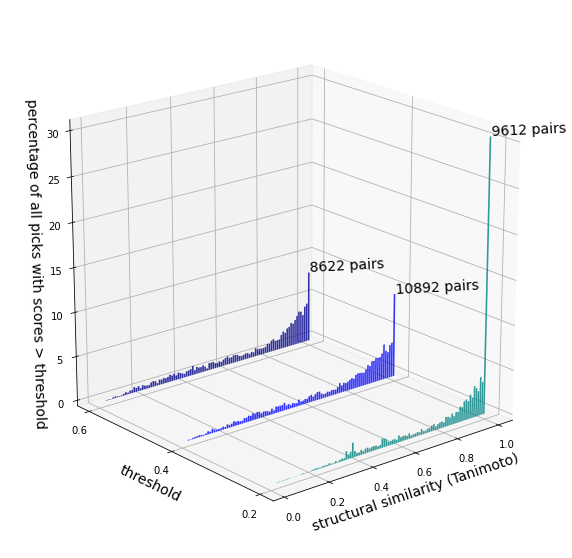

In [51]:
def bar_plot_3d(collect_hist, collect_bins, collect_num_of_scores, thresholds):
    colors = ['pink', 'crimson', 'r', 'turquoise', 'teal', 'b', 'darkblue'][-len(collect_hist):]
    print(colors)
    yticks = thresholds
    count = 0

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')

    for c, k in zip(colors, yticks):
        hist = collect_hist[count]
        bins = collect_bins[count]
        width = 0.8 * (bins[1] - bins[0])
        center = (bins[:-1] + bins[1:]) / 2

        # You can provide either a single color or an array with the same length as
        # xs and ys. To demonstrate this, we color the first bar of each set cyan.
        cs = [c] * len(center)
        #cs[0] = 'c'

        #plt.bar(center, 100*hist/sum(hist), align='center', width=width)

        # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
        ax.bar(center, 100*hist/sum(hist), zs=k, zdir='y', width=width, color=cs, alpha=0.8)
        
        #for zdir, x, y, z in zip(zdirs, xs, ys, zs):
        label = "{} pairs".format(collect_num_of_scores[count]) #'(%d, %d, %d), dir=%s' % (x, y, z, zdir)
        ax.text(1, k, max(100*hist/sum(hist)), label, zdir=(1, -0.25, 0), fontsize=14)

        count += 1

    #ax.set_zlim(0, 10)
    ax.set_xlabel("structural similarity (Tanimoto)", fontsize=14)
    ax.set_ylabel("threshold", fontsize=14)
    ax.set_zlabel("percentage of all picks with scores > threshold", fontsize=14)
    ax.view_init(20, 230)

    # On the y axis let's only label the discrete values that we have data for.
    ax.set_yticks(yticks)

bar_plot_3d([collect_hist_s2v2[3], collect_hist[3], collect_hist_minmatch6[4]],
            [collect_bins_s2v2[3], collect_bins[3], collect_bins_minmatch6[4]],
            [collect_num_of_scores_s2v2[3], collect_num_of_scores[3], collect_num_of_scores_minmatch6[4]],
            [0.2,0.4,0.6])

# Evalute retrievel decay with increasing min_match

In [52]:
retrievals = []
min_matches = [1,2,4,6,8,10,15,20]
for min_match in min_matches:
    
    retrievals.append(np.sum(matrix_matches_mod_cosine < min_match))

In [83]:
retrievals

[68979046,
 97930013,
 125957197,
 137522445,
 143859805,
 147874020,
 153532748,
 156533013]

In [88]:
np.sum(matrix_matches_mod_cosine > -1), sum_scores

(163763209, 163763209)

In [105]:
actual_retrieval_rate

[0.5787878949050149,
 0.4020023569518597,
 0.23085778686713454,
 0.16023601491590211,
 0.12153770142596554,
 0.09702538865124466,
 0.06247105844145984,
 0.044150307289105406]

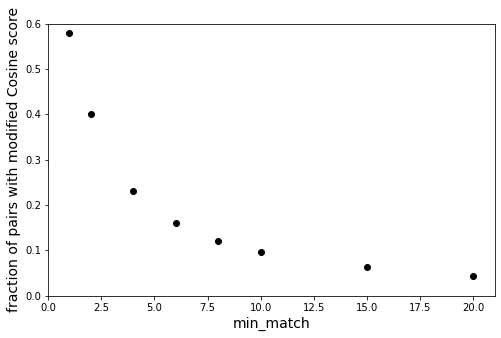

In [104]:
sum_scores = len(matrix_matches_mod_cosine)**2
actual_retrieval_rate = [1 - x/sum_scores for x in retrievals]

plt.figure(figsize=(8,5))
plt.plot(min_matches, actual_retrieval_rate, "o", color="black")
plt.xlabel("min_match", fontsize=14)
plt.ylabel("fraction of pairs with modified Cosine score", fontsize=14)
plt.xlim(0,21)
plt.ylim(0,0.6)
plt.savefig("retrieval_decay_min_match.pdf")

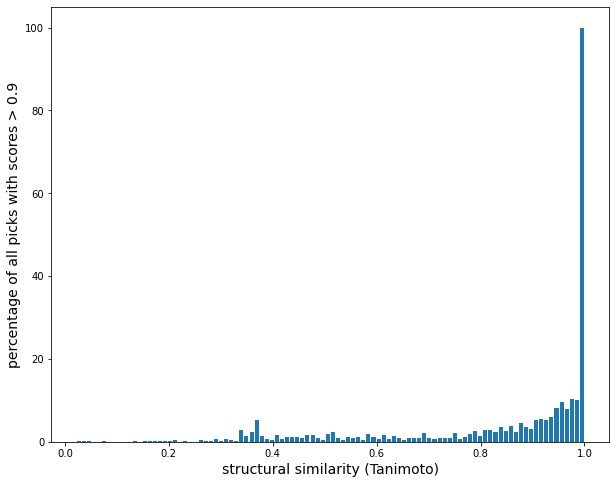

In [61]:
threshold=0.9
def plot_histogram(hist, bins, threshold):
    plt.figure(figsize=(10,8))
    width = 0.8 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, 100*hist/max(hist), align='center', width=width)
    plt.xlabel("structural similarity (Tanimoto)", fontsize=14)
    plt.ylabel("percentage of all picks with scores > {:.2}".format(threshold), fontsize=14)
    
plot_histogram(hist2, bins2, threshold)

In [12]:
high_score_matches = np.where(matrix_similarities_mod_cosine_minmatch10 > 0.8)

0.9890245030062514

In [ ]:
high_score_matches = np.where(matrix_similarities_mod_cosine_minmatch10 > 0.8)

claimed_high_scores = matrix_similarities_fingerprint_daylight[matrix_similarities_mod_cosine_minmatch10 > 0.8]

np.sum((matrix_similarities_mod_cosine_minmatch10 > 0.8))





                          & (matrix_similarities_mod_cosine < 0.4)
                          & (matrix_similarities_mod_cosine > 0)
                & (matrix_similarities_spec2vec > 0.85) 
                & (matrix_similarities_spec2vec < 0.98) 
                & (matrix_similarities_fingerprint_daylight > 0.8))

print("Found ", pair_selection[0].shape, " matching spectral pairs.")

In [50]:
filename = os.path.join(path_data,'similarities_spec2vec_2dec_UniqueInchikeys_iter_50.npy')
matrix_similarities_spec2vec = np.load(filename)

## Compare spec2vec (trained on AllPositive) with reference fingerprint scores

In [17]:
filename = os.path.join(path_data, "percentile_spec2vec_2dec_AllPosModel_iter_15.npy")
percentiles_AllPosModel = np.load(filename)

In [4]:
filename = os.path.join(path_data,'similarities_spec2vec_2dec_AllPositiveModel_15iter.npy')
matrix_similarities_spec2vec_allpositive = np.load(filename)

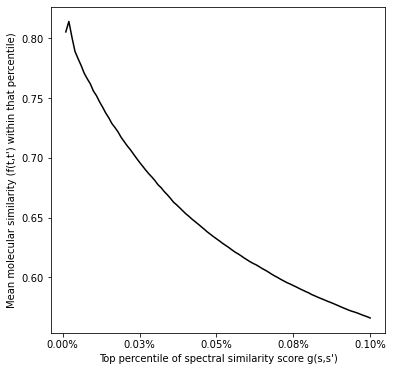

In [7]:
percentile_spec2vec_2dec_AllPos_15iter = plot_precentile(matrix_similarities_fingerprint_daylight,
                                                  matrix_similarities_spec2vec_allpositive,
                                                  num_bins=100, show_top_percentile=0.1,
                                                  ignore_diagonal=True)

In [15]:
from matplotlib import pyplot as plt

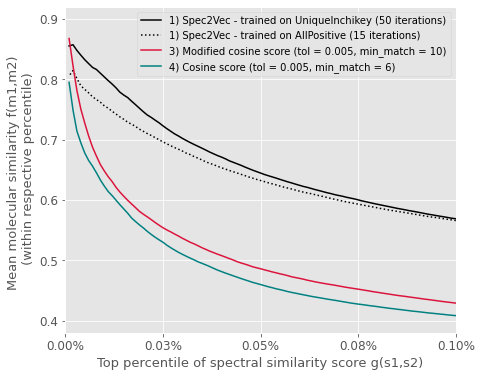

In [18]:
#Compare all:
num_bins = 100
show_top_percentile = 0.1

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,6))

x_percentiles = (show_top_percentile / num_bins * (1 + np.arange(num_bins)))[::-1]

plt.plot(x_percentiles, percentile_spec2vec_2dec_iter_50, 
         color='black',
         label='1) Spec2Vec - trained on UniqueInchikey (50 iterations)')

plt.plot(x_percentiles, percentiles_AllPosModel, 
         ":", color='black',
         label='1) Spec2Vec - trained on AllPositive (15 iterations)')

plt.plot(x_percentiles, percentile_mod_cosine_tol0005, 
         color='crimson',
         label='3) Modified cosine score (tol = 0.005, min_match = 10)')

plt.plot(x_percentiles, percentile_cosine_tol0005, 
         color='teal', #'gold',
         label='4) Cosine score (tol = 0.005, min_match = 6)')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.xticks(np.arange(0, 0.11, step=0.02), ('0.00%', '0.02%', '0.04%', '0.06%', '0.08%', '0.10%'))
plt.xticks(np.linspace(0, show_top_percentile, 5),
           ["{:.2f}%".format(x) for x in np.linspace(0, show_top_percentile, 5)])
plt.legend()
plt.xlabel("Top percentile of spectral similarity score g(s1,s2)", fontsize=13)
plt.ylabel("Mean molecular similarity f(m1,m2) \n (within respective percentile)", fontsize=13)
plt.xlim(0, 0.1)
plt.ylim(0.38, 0.92)
plt.savefig(os.path.join(path_data, 'Benchmarking_top_percentil_comparison2.pdf'))